In [7]:
# coding: utf-8

import requests
from bs4 import BeautifulSoup
import csv
r=requests.get('https://movie.douban.com/top250')
mypage= r.text

page_next=[]
url = 'https://movie.douban.com/top250'
for q in [-25,0,25,50,75,100,125,150,175,200,225]:
    page_number=str(q + 25)
    url_next=url+ "?start=" + page_number + '&filter='
    page_next.append(url_next)

cn_name = []
en_name = []
comment_number = []
rating = []

data = []

actors = []
year = []
area= []
types = []
genre = []
location = []
director  = []

for page in page_next:
    l1 = requests.get(page).text
    mypage = BeautifulSoup(l1,'html.parser')
    mylis = mypage.find('ol', attrs={'class': 'grid_view'}).find_all('li')

    for li in mylis:
        myspans = li.find('div', attrs={'class': 'hd'}).find_all('span')
        cn_name.append(myspans[0].text)
        en_name.append(myspans[1].text[3:])
        comment_number.append(li.find('div', attrs={'class': 'star'}).find_all('span')[3].text[:-3])
        rating.append(li.find('span', attrs={'class': 'rating_num'}).text)
        directors = li.find('p').text.strip()
        
        staff = directors.replace(u'\xa0', u' ')
        idx_director = staff.find('导演:')
        idx_actors = staff.find('主')
        if len(staff[idx_director:idx_actors]) < 61:
            director.append(staff[idx_director:idx_actors])
        else:
            director.append(staff[idx_director:62])
        parts = staff.split('/')
        year.append(parts[-3].split()[-1])
        area.append(parts[-2])
        types.append(parts[-1])


        # idx = director.find('主演')
        # directors.append(director[:idx])
        # actors.append(director[idx:])

        # d = [i.strip() for i in director[idx:].split('/')]
    # print(staff)
        # genre.append(d[-1])
        # location.append(d[-2]) 

# print (directors#data.append([cn_name, en_name,  rating, comment_number , director])





with open('data_new.csv','w') as f:
     writers = csv.writer(f)
     header = ['cn_name','alias','rating' , 'comment_number' , 'director','year','area','types']
     writers.writerow(header)
     writers.writerows(zip(cn_name,en_name,rating,comment_number,director,year,area,types))
#      writers.writerow(year)
#      writers.writerow(rating)
#      writers.writerow(types)

In [8]:
import pandas
import matplotlib
import seaborn

In [9]:
df = pandas.read_csv('data_new.csv')
df

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988064,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,717731,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
2,这个杀手不太冷,Léon,9.4,931434,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
3,阿甘正传,Forrest Gump,9.4,792331,导演: Robert Zemeckis,1994,美国,剧情 爱情
4,美丽人生,La vita è bella,9.5,462773,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
5,千与千寻,千と千尋の神隠し,9.2,741157,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,731869,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422004,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834114,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547004,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [36]:
df['year'].value_counts()


2010          13
2004          13
2001          12
1994          11
2009          11
2008          10
2013          10
2011          10
1997           9
2014           9
2006           9
2002           9
1999           8
1995           8
2003           8
1993           7
2007           7
2000           7
2016           6
1996           5
2015           5
1991           5
1988           5
1998           5
2012           5
2005           4
1987           3
1990           3
1953           2
1957           2
1966           2
1989           2
1986           2
1992           2
1984           2
1952           1
1972           1
1942           1
1954           1
1980           1
1982           1
1975           1
1936           1
1979           1
1939           1
1965           1
2017           1
1931           1
1960           1
1974           1
1950           1
1940           1
1971           1
2004(中国大陆)     1
Name: year, dtype: int64

In [34]:
len(df[df['year'] > '2000'])

143

In [12]:
df['rating'].mean()

8.782399999999999

In [13]:
df['rating'].min()

8.3

In [14]:
df['rating'].max()

9.6

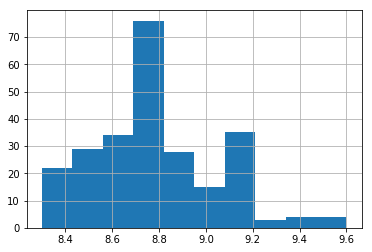

In [15]:
df['rating'].hist(bins=10)

In [16]:
df.sort_values(by='rating', ascending=False).head(10)

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988064,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
41,控方证人,Witness for the Prosecution,9.6,105800,导演: 比利·怀尔德 Billy Wilder,1957,美国,剧情 犯罪 悬疑
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,717731,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
4,美丽人生,La vita è bella,9.5,462773,导演: 罗伯托·贝尼尼 Roberto Benigni,1997,意大利,剧情 喜剧 爱情 战争
7,辛德勒的名单,Schindler's List,9.4,422004,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
26,十二怒汉,12 Angry Men,9.4,186684,导演: Sidney Lumet,1957,美国,剧情
3,阿甘正传,Forrest Gump,9.4,792331,导演: Robert Zemeckis,1994,美国,剧情 爱情
2,这个杀手不太冷,Léon,9.4,931434,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,834114,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547004,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险


In [17]:
df[df['rating'] < 8.7]

,cn_name,alias,rating,comment_number,director,year,area,types
86,禁闭岛,Shutter Island,8.6,381227,导演: Martin Scorsese,2010,美国,剧情 悬疑 惊悚
92,致命ID,Identity,8.6,337014,导演: James Mangold,2003,美国,剧情 悬疑 惊悚
96,断背山,Brokeback Mountain,8.6,337303,导演: 李安 Ang Lee,2005,美国 加拿大,剧情 爱情 同性 家庭
100,加勒比海盗,Pirates of the Caribbean: The Curse of the Bla...,8.6,364945,导演: 戈尔·维宾斯基 Gore Verbinski,2003,美国,动作 冒险 奇幻
102,阿凡达,Avatar,8.6,553986,导演: 詹姆斯·卡梅隆 James Cameron,2009,美国 英国,动作 科幻 冒险
110,倩女幽魂,倩女幽魂(87版) / A Chinese Ghost Story,8.6,267596,导演: 程小东 Siu-Tung Ching,1987,香港,剧情 爱情 武侠 古装
116,幸福终点站,The Terminal,8.6,234208,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,2004,美国,喜剧 剧情 爱情
117,岁月神偷,歲月神偷,8.6,318199,导演: 罗启锐 Alex Law,2010,香港 中国大陆,剧情 家庭
119,神偷奶爸,Despicable Me,8.5,396233,导演: 皮艾尔·柯芬 Pierre Coffin / 克里斯·雷纳德 Chris Renau...,2010,美国 法国,喜剧 动画 冒险
122,喜剧之王,喜劇之王,8.5,331238,导演: 周星驰 Stephen Chow / 李力持 Lik-Chi Lee,1999,香港,喜剧 剧情 爱情


In [49]:
df9= df.sort_values(by='comment_number', ascending=False).head(100)
df9

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988064,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
2,这个杀手不太冷,Léon,9.4,931434,导演: 吕克·贝松 Luc Besson,1994,法国,剧情 动作 犯罪
8,盗梦空间,Inception,9.3,834114,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
3,阿甘正传,Forrest Gump,9.4,792331,导演: Robert Zemeckis,1994,美国,剧情 爱情
11,三傻大闹宝莱坞,3 Idiots,9.2,747546,导演: 拉库马·希拉尼 Rajkumar Hirani,2009,印度,剧情 喜剧 爱情 歌舞
5,千与千寻,千と千尋の神隠し,9.2,741157,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
6,泰坦尼克号,Titanic,9.2,731869,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,717731,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662192,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
10,海上钢琴师,La leggenda del pianista sull'oceano,9.2,644948,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1998,意大利,剧情 音乐


In [57]:
df9[df9['rating'] > 9.0].sort_values(by='comment_number', ascending=True)

,cn_name,alias,rating,comment_number,director,year,area,types
39,两杆大烟枪,"Lock, Stock and Two Smoking Barrels",9.1,291630,导演: Guy Ritchie,1998,英国,剧情 喜剧 犯罪
19,乱世佳人,Gone with the Wind,9.2,293415,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争
32,活着,人生 / Lifetimes,9.1,297724,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
18,熔炉,도가니,9.2,298848,导演: 黄东赫 Dong-hyuk Hwang,2011,韩国,剧情
29,指环王3：王者无敌,The Lord of the Rings: The Return of the King,9.1,308247,导演: 彼得·杰克逊 Peter Jackson,2003,美国 新西兰,剧情 动作 奇幻 冒险
24,天堂电影院,Nuovo Cinema Paradiso,9.1,332109,导演: 朱塞佩·托纳多雷 Giuseppe Tornatore,1988,意大利 法国,剧情 爱情
15,教父,The Godfather,9.2,376282,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
21,触不可及,Intouchables,9.1,404391,导演: 奥利维·那卡什 Olivier Nakache / 艾力克·托兰达 Eric Tol...,2011,法国,剧情 喜剧
7,辛德勒的名单,Schindler's List,9.4,422004,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
16,龙猫,となりのトトロ,9.1,461388,导演: 宫崎骏 Hayao Miyazaki,1988,日本,儿童 动画 奇幻 家庭


In [56]:
df9[df9['rating'] < 9.0].sort_values(by='comment_number', ascending=False)

,cn_name,alias,rating,comment_number,director,year,area,types
77,让子弹飞,让子弹飞一会儿 / 火烧云,8.7,662192,导演: 姜文 Wen Jiang,2010,中国大陆 香港,剧情 喜剧 动作 西部
25,怦然心动,Flipped,8.9,614843,导演: 罗伯·莱纳 Rob Reiner,2010,美国,剧情 喜剧 爱情
23,当幸福来敲门,The Pursuit of Happyness,8.9,591623,导演: 加布里尔·穆奇诺 Gabriele Muccino,2006,美国,剧情 传记 家庭
102,阿凡达,Avatar,8.6,553986,导演: 詹姆斯·卡梅隆 James Cameron,2009,美国 英国,动作 科幻 冒险
36,飞屋环游记,Up,8.9,542358,导演: 彼特·道格特 Pete Docter / 鲍勃·彼德森 Bob Peterson,2009,美国,剧情 喜剧 动画 冒险
66,剪刀手爱德华,Edward Scissorhands,8.7,514345,导演: Tim Burton,1990,美国,剧情 奇幻 爱情
56,天使爱美丽,Le fabuleux destin d'Amélie Poulain,8.7,511659,导演: 让-皮埃尔·热内 Jean-Pierre Jeunet,2001,法国 德国,喜剧 爱情
223,你的名字。,君の名は。,8.4,476222,导演: 新海诚 Makoto Shinkai,2016,日本,剧情 爱情 动画
218,初恋这件小事,สิ่งเล็กเล็กที่เรียกว่า...รัก,8.3,470425,导演: 普特鹏·普罗萨卡·那·萨克那卡林 Puttipong Promsaka Na Sak...,2010,泰国,剧情 喜剧 爱情
58,七宗罪,Se7en,8.7,461079,导演: 大卫·芬奇 David Fincher,1995,美国,剧情 犯罪 悬疑 惊悚


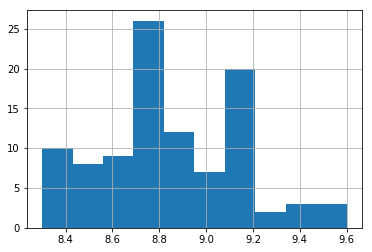

In [51]:
df9['rating'].head(100).hist(bins=10)

In [19]:
df['area'].value_counts()

 美国                   85
 日本                   30
 香港                   13
 美国 英国                10
 韩国                    9
 美国 德国                 7
 中国大陆 香港               6
 英国                    5
 中国大陆                  5
 英国 美国                 4
 美国 加拿大                4
 香港 中国大陆               4
 美国 法国                 4
 美国 澳大利亚               3
 印度                    3
 美国 德国 英国              2
 意大利                   2
 台湾 美国                 2
 德国                    2
 意大利 美国                2
 美国 新西兰                2
 法国                    2
 巴西 法国                 1
 美国 英国 德国              1
 意大利 法国 巴西 美国          1
 伊朗 法国                 1
 香港 法国                 1
 英国 美国 法国              1
 美国 德国 捷克              1
 台湾                    1
                      ..
 美国 奥地利 瑞士             1
 美国 台湾 英国 加拿大          1
 英国 澳大利亚 美国            1
 法国 美国 意大利             1
 阿根廷 西班牙               1
 丹麦 瑞典                 1
 爱尔兰                   1
 美国 英国 加拿大 冰岛          1
 德国 法国 西班牙 美国          1


In [20]:
def is_select(x):
    return x.find('美国') != -1 
df1 = df[df['area'].apply(is_select)]
df1

,cn_name,alias,rating,comment_number,director,year,area,types
0,肖申克的救赎,The Shawshank Redemption,9.6,988064,导演: 弗兰克·德拉邦特 Frank Darabont,1994,美国,犯罪 剧情
3,阿甘正传,Forrest Gump,9.4,792331,导演: Robert Zemeckis,1994,美国,剧情 爱情
6,泰坦尼克号,Titanic,9.2,731869,导演: 詹姆斯·卡梅隆 James Cameron,1997,美国,剧情 爱情 灾难
7,辛德勒的名单,Schindler's List,9.4,422004,导演: 史蒂文·斯皮尔伯格 Steven Spielberg,1993,美国,剧情 历史 战争
8,盗梦空间,Inception,9.3,834114,导演: 克里斯托弗·诺兰 Christopher Nolan,2010,美国 英国,剧情 科幻 悬疑 冒险
9,机器人总动员,WALL·E,9.3,547004,导演: 安德鲁·斯坦顿 Andrew Stanton,2008,美国,爱情 科幻 动画 冒险
12,忠犬八公的故事,Hachi: A Dog's Tale,9.2,513704,导演: 莱塞·霍尔斯道姆 Lasse Hallström,2009,美国 英国,剧情
15,教父,The Godfather,9.2,376282,导演: 弗朗西斯·福特·科波拉 Francis Ford Coppola,1972,美国,剧情 犯罪
17,楚门的世界,The Truman Show,9.1,515446,导演: 彼得·威尔 Peter Weir,1998,美国,剧情 科幻
19,乱世佳人,Gone with the Wind,9.2,293415,导演: 维克多·弗莱明 Victor Fleming / 乔治·库克 George Cuko...,1939,美国,剧情 历史 爱情 战争


In [21]:
len(df1)

142

In [22]:
def is_select(x):
    return x.find('日本') != -1 
df3 = df[df['area'].apply(is_select)]
df3

,cn_name,alias,rating,comment_number,director,year,area,types
5,千与千寻,千と千尋の神隠し,9.2,741157,导演: 宫崎骏 Hayao Miyazaki,2001,日本,剧情 动画 奇幻
16,龙猫,となりのトトロ,9.1,461388,导演: 宫崎骏 Hayao Miyazaki,1988,日本,儿童 动画 奇幻 家庭
33,天空之城,天空の城ラピュタ,9.0,361560,导演: 宫崎骏 Hayao Miyazaki,1986,日本,动画 奇幻 冒险
44,哈尔的移动城堡,ハウルの動く城,8.9,383097,导演: 宫崎骏 Hayao Miyazaki,2004,日本,爱情 动画 奇幻 冒险
52,情书,Love Letter,8.8,403018,导演: 岩井俊二 Shunji Iwai,1995,日本,剧情 爱情
59,被嫌弃的松子的一生,嫌われ松子の一生,8.9,311939,导演: 中岛哲也 Tetsuya Nakashima,2006,日本,剧情 歌舞
74,入殓师,おくりびと,8.8,333378,导演: 泷田洋二郎 Yôjirô Takita,2008,日本,剧情
78,春光乍泄,春光乍洩,8.8,263433,导演: 王家卫 Kar Wai Wong,1997,香港 日本 韩国,剧情 爱情 同性
81,幽灵公主,もののけ姫,8.8,249352,导演: 宫崎骏 Hayao Miyazaki,1997,日本,动作 爱情 战争 动画 奇幻 冒险
94,一一,Yi yi / Yi yi: A One and a Two,8.9,164024,导演: 杨德昌 Edward Yang,2000,台湾 日本,剧情 爱情 家庭


In [23]:
len(df3)

32

In [24]:
def is_select(x):
    return x.find('中国') != -1 
df2 = df[df['area'].apply(is_select)]
df2['year'].value_counts()

2010          2
1995          2
1994          2
2014          1
1992          1
1987          1
1979          1
2015          1
2006          1
2000          1
2004(中国大陆)    1
1993          1
2004          1
Name: year, dtype: int64

In [25]:
df2.sort_values(by='rating', ascending=False)

,cn_name,alias,rating,comment_number,director,year,area,types
1,霸王别姬,再见，我的妾 / Farewell My Concubine,9.5,717731,导演: 陈凯歌 Kaige Chen,1993,中国大陆 香港,剧情 爱情 同性
14,大话西游之大圣娶亲,西遊記大結局之仙履奇緣,9.2,545599,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
30,鬼子来了,Devils on the Doorstep,9.2,253307,导演: 姜文 Wen Jiang,2000,中国大陆,剧情 战争
79,大闹天宫,大闹天宫 上下集 / The Monkey King,9.2,108310,导演: 万籁鸣 Laiming Wan / 唐澄 Cheng Tang,2004(中国大陆),中国大陆,动画 奇幻
32,活着,人生 / Lifetimes,9.1,297724,导演: 张艺谋 Yimou Zhang,1994,中国大陆 香港,剧情 历史 家庭
35,大话西游之月光宝盒,西遊記第壹佰零壹回之月光寶盒,8.9,439463,导演: 刘镇伟 Jeffrey Lau,1995,香港 中国大陆,喜剧 爱情 奇幻 冒险
84,末代皇帝,The Last Emperor,8.9,182123,导演: 贝纳尔多·贝托鲁奇 Bernardo Bertolucci,1987,意大利 中国大陆 英国 法国,剧情 传记 历史
196,哪吒闹海,Prince Nezha's Triumph Against Dragon King / ...,8.9,82594,导演: 严定宪 Dingxian Yan / 王树忱 Shuchen Wang,1979,中国大陆,冒险 动画 奇幻
82,阳光灿烂的日子,In the Heat of the Sun,8.8,286668,导演: 姜文 Wen Jiang,1994,中国大陆 香港,剧情
157,二十二,Twenty Two / 22,8.8,94396,导演: 郭柯 Ke Guo,2015,中国大陆,纪录片


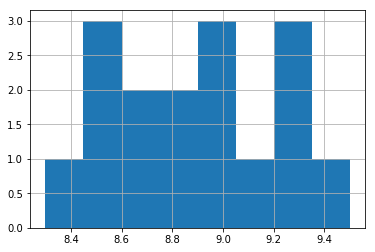

In [26]:
df2['rating'].hist(bins=8)

In [27]:
len(df2)

16